In [1]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 1.1 MB/s 


In [75]:
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
name='1dc.512'
f = open(name)
a=f.readlines()


In [76]:
b=[]
for i in range(1,len(a)):
    b.append(a[i].split())
df = pd.DataFrame(b,columns=['s','t'])

In [77]:
#df=df.drop(columns=['e'])

In [79]:
df = df.apply(pd.to_numeric)

In [80]:
G = nx.from_pandas_edgelist(df, source='s', target='t')

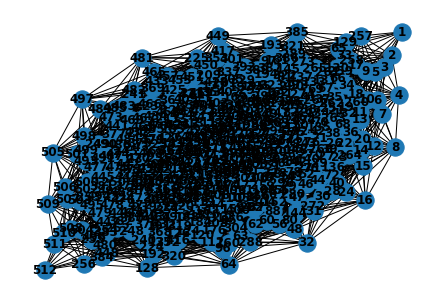

In [81]:
nx.draw(G, with_labels=True, font_weight='bold')

In [9]:
[n for n in G.edges]

[(0, 3),
 (0, 28),
 (0, 42),
 (0, 61),
 (0, 69),
 (0, 94),
 (0, 96),
 (0, 106),
 (0, 161),
 (0, 179),
 (0, 194),
 (3, 18),
 (3, 19),
 (3, 22),
 (3, 25),
 (3, 29),
 (3, 43),
 (3, 47),
 (3, 55),
 (3, 58),
 (3, 79),
 (3, 82),
 (3, 88),
 (3, 92),
 (3, 96),
 (3, 122),
 (3, 126),
 (3, 136),
 (3, 154),
 (3, 169),
 (3, 191),
 (28, 13),
 (28, 33),
 (28, 47),
 (28, 60),
 (28, 63),
 (28, 73),
 (28, 84),
 (28, 95),
 (28, 119),
 (28, 147),
 (28, 151),
 (28, 153),
 (28, 155),
 (28, 162),
 (28, 167),
 (28, 173),
 (28, 190),
 (28, 195),
 (42, 25),
 (42, 54),
 (42, 62),
 (42, 63),
 (42, 77),
 (42, 82),
 (42, 83),
 (42, 91),
 (42, 93),
 (42, 99),
 (42, 114),
 (42, 128),
 (42, 143),
 (42, 144),
 (42, 150),
 (42, 170),
 (42, 191),
 (61, 1),
 (61, 8),
 (61, 17),
 (61, 30),
 (61, 46),
 (61, 48),
 (61, 50),
 (61, 56),
 (61, 77),
 (61, 84),
 (61, 140),
 (61, 141),
 (61, 142),
 (61, 158),
 (61, 194),
 (69, 22),
 (69, 33),
 (69, 34),
 (69, 44),
 (69, 49),
 (69, 58),
 (69, 74),
 (69, 80),
 (69, 82),
 (69, 94),
 

In [10]:
#[n for n in G.neighbors(0)]

In [11]:
one=[]
for i in G.nodes:
    one.append((i,[n for n in G.neighbors(i)]))

## **independent set**

In [65]:
prob = LpProblem("Problem",LpMaximize)

In [66]:
xx = LpVariable.dicts("x", (G.nodes), cat='Binary')

In [67]:
prob += pulp.lpSum([1*xx[i] for i in G.nodes])

In [68]:
for i in G.nodes:
    for n in G.neighbors(i):
        prob += pulp.lpSum([1*xx[n] + 1*xx[i] ])<=1

In [69]:
prob

Problem:
MAXIMIZE
1*x_1 + 1*x_10 + 1*x_11 + 1*x_12 + 1*x_13 + 1*x_14 + 1*x_15 + 1*x_16 + 1*x_17 + 1*x_18 + 1*x_19 + 1*x_2 + 1*x_20 + 1*x_21 + 1*x_22 + 1*x_23 + 1*x_24 + 1*x_25 + 1*x_26 + 1*x_27 + 1*x_28 + 1*x_29 + 1*x_3 + 1*x_30 + 1*x_31 + 1*x_32 + 1*x_33 + 1*x_34 + 1*x_35 + 1*x_36 + 1*x_37 + 1*x_38 + 1*x_39 + 1*x_4 + 1*x_40 + 1*x_41 + 1*x_42 + 1*x_43 + 1*x_44 + 1*x_45 + 1*x_46 + 1*x_47 + 1*x_48 + 1*x_49 + 1*x_5 + 1*x_50 + 1*x_51 + 1*x_52 + 1*x_53 + 1*x_54 + 1*x_55 + 1*x_56 + 1*x_57 + 1*x_58 + 1*x_59 + 1*x_6 + 1*x_60 + 1*x_61 + 1*x_62 + 1*x_63 + 1*x_64 + 1*x_7 + 1*x_8 + 1*x_9 + 0
SUBJECT TO
_C1: x_1 + x_2 <= 1

_C2: x_1 + x_3 <= 1

_C3: x_1 + x_5 <= 1

_C4: x_1 + x_9 <= 1

_C5: x_1 + x_17 <= 1

_C6: x_1 + x_33 <= 1

_C7: x_1 + x_2 <= 1

_C8: x_2 + x_3 <= 1

_C9: x_2 + x_4 <= 1

_C10: x_2 + x_5 <= 1

_C11: x_2 + x_6 <= 1

_C12: x_2 + x_9 <= 1

_C13: x_10 + x_2 <= 1

_C14: x_17 + x_2 <= 1

_C15: x_18 + x_2 <= 1

_C16: x_2 + x_33 <= 1

_C17: x_2 + x_34 <= 1

_C18: x_1 + x_3 <= 1

_C19: x_

In [70]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [71]:
b=name+".lp"
prob.writeLP(b)
prob.solve()


# OUTPUT

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    if v.varValue !=0:
        print(v.name, "=", v.varValue)
production = [v.varValue for v in prob.variables()]

# The optimised objective function value is printed to the console
print("Total price = ", pulp.value(prob.objective))

x_1 = 1.0
x_13 = 1.0
x_19 = 1.0
x_31 = 1.0
x_34 = 1.0
x_46 = 1.0
x_52 = 1.0
x_57 = 1.0
x_64 = 1.0
x_8 = 1.0
Total price =  10.0


# **distance-d independent set**

In [82]:
prob = LpProblem("Problem",LpMaximize)

In [83]:
xx = LpVariable.dicts("x", (G.nodes), cat='Binary')

In [84]:
prob += pulp.lpSum([1*xx[i] for i in G.nodes])

In [85]:
#k=int(input())
k=3

In [86]:
b=0
for i in G.nodes:
    a= nx.single_source_shortest_path_length(G, i, k-1)
    print(a)
    for j in a:
        if j!=i:
          print("j=",j,"i=",i)
          b=b+1
          prob += pulp.lpSum([1*xx[i] + 1*xx[j] ])<=1

Streaming output truncated to the last 5000 lines.
j= 411 i= 478
j= 412 i= 478
j= 413 i= 478
j= 415 i= 478
j= 416 i= 478
j= 422 i= 478
j= 423 i= 478
j= 424 i= 478
j= 426 i= 478
j= 427 i= 478
j= 428 i= 478
j= 429 i= 478
j= 434 i= 478
j= 435 i= 478
j= 436 i= 478
j= 437 i= 478
j= 439 i= 478
j= 440 i= 478
j= 441 i= 478
j= 445 i= 478
j= 447 i= 478
j= 448 i= 478
j= 454 i= 478
j= 455 i= 478
j= 456 i= 478
j= 458 i= 478
j= 459 i= 478
j= 460 i= 478
j= 461 i= 478
j= 466 i= 478
j= 467 i= 478
j= 468 i= 478
j= 469 i= 478
j= 473 i= 478
j= 486 i= 478
j= 487 i= 478
j= 488 i= 478
j= 490 i= 478
j= 491 i= 478
j= 492 i= 478
j= 493 i= 478
j= 498 i= 478
j= 499 i= 478
j= 500 i= 478
j= 501 i= 478
j= 503 i= 478
j= 504 i= 478
j= 505 i= 478
j= 509 i= 478
j= 511 i= 478
{479: 0, 255: 1, 511: 1, 415: 1, 431: 1, 432: 1, 439: 1, 443: 1, 445: 1, 446: 1, 447: 1, 463: 1, 464: 1, 471: 1, 472: 1, 475: 1, 476: 1, 477: 1, 478: 1, 223: 1, 351: 1, 480: 1, 239: 1, 240: 1, 367: 1, 368: 1, 495: 1, 496: 1, 503: 1, 507: 1, 509: 1, 

In [87]:
print(b)

109790


In [88]:
prob

Problem:
MAXIMIZE
1*x_1 + 1*x_10 + 1*x_100 + 1*x_101 + 1*x_102 + 1*x_103 + 1*x_104 + 1*x_105 + 1*x_106 + 1*x_107 + 1*x_108 + 1*x_109 + 1*x_11 + 1*x_110 + 1*x_111 + 1*x_112 + 1*x_113 + 1*x_114 + 1*x_115 + 1*x_116 + 1*x_117 + 1*x_118 + 1*x_119 + 1*x_12 + 1*x_120 + 1*x_121 + 1*x_122 + 1*x_123 + 1*x_124 + 1*x_125 + 1*x_126 + 1*x_127 + 1*x_128 + 1*x_129 + 1*x_13 + 1*x_130 + 1*x_131 + 1*x_132 + 1*x_133 + 1*x_134 + 1*x_135 + 1*x_136 + 1*x_137 + 1*x_138 + 1*x_139 + 1*x_14 + 1*x_140 + 1*x_141 + 1*x_142 + 1*x_143 + 1*x_144 + 1*x_145 + 1*x_146 + 1*x_147 + 1*x_148 + 1*x_149 + 1*x_15 + 1*x_150 + 1*x_151 + 1*x_152 + 1*x_153 + 1*x_154 + 1*x_155 + 1*x_156 + 1*x_157 + 1*x_158 + 1*x_159 + 1*x_16 + 1*x_160 + 1*x_161 + 1*x_162 + 1*x_163 + 1*x_164 + 1*x_165 + 1*x_166 + 1*x_167 + 1*x_168 + 1*x_169 + 1*x_17 + 1*x_170 + 1*x_171 + 1*x_172 + 1*x_173 + 1*x_174 + 1*x_175 + 1*x_176 + 1*x_177 + 1*x_178 + 1*x_179 + 1*x_18 + 1*x_180 + 1*x_181 + 1*x_182 + 1*x_183 + 1*x_184 + 1*x_185 + 1*x_186 + 1*x_187 + 1*x_188 + 1*x

In [ ]:
prob.solve()
print("Status:", LpStatus[prob.status])

In [ ]:
b=name+'__3.lp'

In [ ]:
prob.writeLP(b)

In [ ]:

prob.writeLP(b)
prob.solve()


# OUTPUT

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    if v.varValue !=0:
        print(v.name, "=", v.varValue)
production = [v.varValue for v in prob.variables()]

# The optimised objective function value is printed to the console
print("Total price = ", pulp.value(prob.objective))